# Bit error rate (BER) performance analysis in digital modulations

This notebook intends to simulate a digital communication system, and demonstrate its error performance during a transmission in a noise channel. The results are compared with the theorethical probabilities of error equations for PSK, FSK, and QAM modulations.

## Simplified digital communication system

For simulation purposes, the simplified model shown in the figure below works fairly well. A complete and detailed digital communication system can be studied in [1].

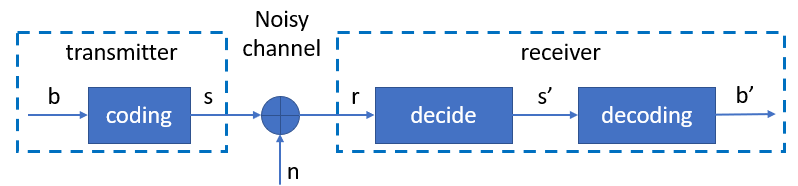

In [1]:
from IPython.display import Image
Image("images/dig_com_system.png", width = 500)

A binary message ***b*** will be coded by the transmitter in the signal ***s*** to be transmitted in a noisy channel. The channel will inject (*add*) noise ***n*** in the signal ***s***. The received signal ***r*** is the sum of the signal ***s*** and the noise ***n***. Having ***r***, the receiver will "decide" which symbol is represented by ***r***, then it will create a new sequence ***s'*** which will be decoded in the received message ***b'***.

If everything goes well ***b*** and ***b'*** will be exactly the same and we have a successful transmission. On the other hand, if the noise it too intense it modifies the received signal in a way the "decide" step maps ***r*** in the wrong symbol ***s'*** which is decoded in the wrong message ***b'***. In this case, we have an unsuccessful transmission. 

Repeating this process many times for different messages ***b*** generated aleatorily and collecting the statistics will allow us to verify the performance of each modulation.

## Digital modulation - Theoretical bit error rate equations

### Definitions

$E_b$ - Signal energy

$N_0$ - White noise spectral density

More details in [[1]](#ref_1).

$P_{B}\left( x \right)$ - Bit error probability

From equation 4.77 in [[2]](#ref_2), The function $Q(x)$, called the complementary error function or co-error function is defined as:

$Q \left( X \right) = \frac{1}{\sqrt{2 \pi}} \int_{x}^{\infty} e^{\left( - \frac{u^{2}}{2} \right)} du $

$Q \left( X \right) = 1 - \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{x} e^{\left( - \frac{u^{2}}{2} \right)} du = 1 - \Phi \left( X \right)$

Where $\Phi \left( X \right)$ is the cumulative distribution function (CDF).

In [2]:
# importing some useful libraries
from scipy.stats import norm
from matplotlib import pyplot as mp
import numpy as np

In [3]:
# defining Q(X)
def Q(x):
    return 1 - norm.cdf(x)

# creating Eb array from 0.1 to 1000 spaced on a log scale
Eb_values = np.logspace(-1, 3, num=100)

# creating N0 array full of 1s
Mu = 0
N0 = 1
N0_values = np.full(100,N0)

# creating Eb/N0 array in dB (useful to plot the BER graphs.
Eb_N0_dB = 10 * np.log10(Eb_values / N0_values)

### M-PSK

From equation 4.79 in [[2]](#ref_2), for M=2:

$ P_{B_{BPSK}} = Q \left( \sqrt{\frac{2 E_{b}}{N_{0}}} \right) $


From equation 4.105 and 4.113 in [[2]](#ref_2), for M>2:

$ P_{B_{MPSK}} = \frac{2}{log_{2} \left( M \right)} Q \left( \sqrt{\frac{2 E_{b} log_{2} \left( M \right)}{N_{0}}}  sin \left( \frac{\pi}{M} \right) \right)$

In [4]:
# defining PB_MPSK
def PB_MPSK(Eb, N0, M):
    if M == 2:
        return Q(np.sqrt(2 * Eb / N0))
    else:
        return (2 / np.log2(M)) * Q(np.sqrt((2 * Eb * np.log2(M) ) / N0) * np.sin (np.pi / M))

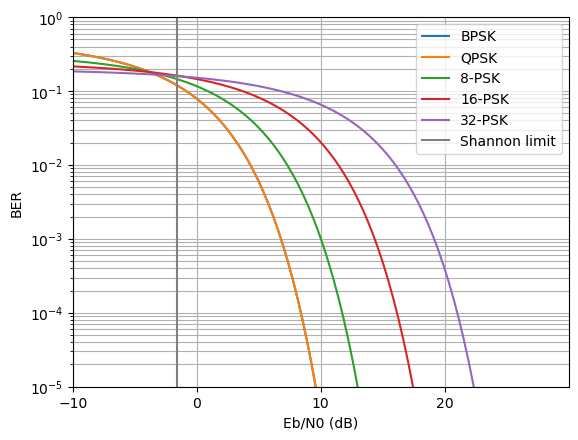

In [5]:
#plotting PB_MPSK for M = 2, 4, 8, 16 and 32
mp.plot(Eb_N0_dB, PB_MPSK(Eb_values, N0_values,2), label = 'BPSK')
mp.plot(Eb_N0_dB, PB_MPSK(Eb_values, N0_values,4), label = 'QPSK')
mp.plot(Eb_N0_dB, PB_MPSK(Eb_values, N0_values,8), label = '8-PSK')
mp.plot(Eb_N0_dB, PB_MPSK(Eb_values, N0_values,16), label = '16-PSK')
mp.plot(Eb_N0_dB, PB_MPSK(Eb_values, N0_values,32), label = '32-PSK')

#x axis settings
mp.xlim(-2, 30)
#mp.xscale('log')
mp.grid(visible = None, which = 'major', axis = 'x')
mp.xticks(np.arange(-10, 30, step=10))
mp.xlabel('Eb/N0 (dB)')
mp.axvline(-1.6, 10E-6, 1, color = 'gray', label = 'Shannon limit')

#y axis settings
mp.ylim(10E-6, 1)
mp.yscale('log')
mp.grid(visible = None, which = 'both', axis = 'y')
#yticks(np.arange(0, 1, step=0.2))
mp.ylabel('BER')

mp.legend()
mp.show()

### MFSK

From equations 4.107 and 4.112 in [[2]](#ref_2):

$ P_{B_{MFSK}}=\left( \frac{M}{2} \right) Q \left( \sqrt{\frac{E_{b} * log_{2} \left( M \right) }{N_{0}}} \right) $

In [6]:
# defining PB_MFSK
def PB_MFSK(Eb, N0, M):
    return (M / 2) * Q(np.sqrt((Eb * np.log2(M) ) / N0))

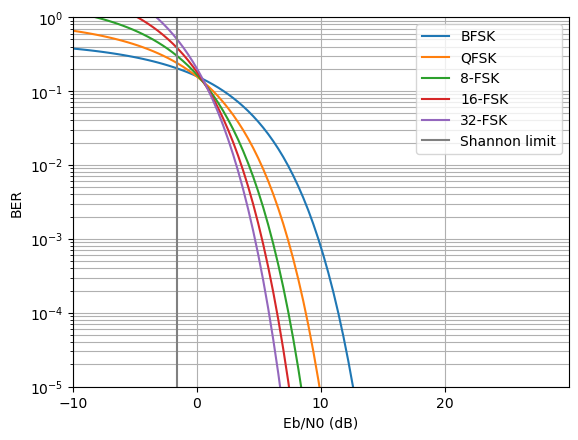

In [7]:
# plotting PB_MFSK for M = 2, 4, 8, 16 and 32
mp.plot(Eb_N0_dB, PB_MFSK(Eb_values, N0_values,2), label = 'BFSK')
mp.plot(Eb_N0_dB, PB_MFSK(Eb_values, N0_values,4), label = 'QFSK')
mp.plot(Eb_N0_dB, PB_MFSK(Eb_values, N0_values,8), label = '8-FSK')
mp.plot(Eb_N0_dB, PB_MFSK(Eb_values, N0_values,16), label = '16-FSK')
mp.plot(Eb_N0_dB, PB_MFSK(Eb_values, N0_values,32), label = '32-FSK')

# x axis settings
mp.xlim(-2, 30)
#mp.xscale('log')
mp.grid(visible = None, which = 'major', axis = 'x')
mp.xticks(np.arange(-10, 30, step=10))
mp.xlabel('Eb/N0 (dB)')
mp.axvline(-1.6, 10E-6, 1, color = 'gray', label = 'Shannon limit')

# y axis settings
mp.ylim(10E-6, 1)
mp.yscale('log')
mp.grid(visible = None, which = 'both', axis = 'y')
#yticks(np.arange(0, 1, step=0.2))
mp.ylabel('BER')

mp.legend()
mp.show()

### M-QAM

From equation 9.54 in [[2]](#ref_2):

$P_{B_{M-QAM}} = \frac{2\left( 1 - k^{-1}\right)}{log_{2} \left( k \right)} Q \left[ \sqrt{\left( \frac{3 log_{2} \left( k \right) }{k^{2}-1} \right) \frac{2E_{b}}{N_{0}}} \right]$

Where, $k = log_{2}M$. So, if $M=16 \rightarrow k=4$, $M=32 \rightarrow k=5$, $M=64 \rightarrow k=6$, and so on.

In [8]:
# defining PB_MQAM
def PB_MQAM(Eb, N0, M):
    k = np.log2(M)
    return 2 * (1 - np.power(k, -1)) / np.log2(k) * Q(np.sqrt((3 * np.log2(k) * 2 * Eb) / ((np.power(k,2) -1) * N0)))

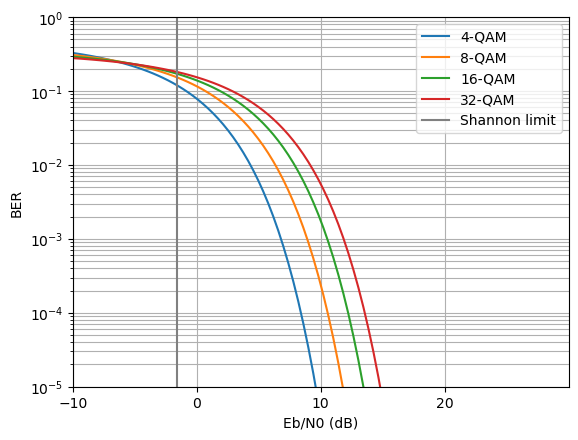

In [9]:
# plotting PB_MQAM for M = 4, 8, 16 and 32
mp.plot(Eb_N0_dB, PB_MQAM(Eb_values, N0_values,4), label = '4-QAM')
mp.plot(Eb_N0_dB, PB_MQAM(Eb_values, N0_values,8), label = '8-QAM')
mp.plot(Eb_N0_dB, PB_MQAM(Eb_values, N0_values,16), label = '16-QAM')
mp.plot(Eb_N0_dB, PB_MQAM(Eb_values, N0_values,32), label = '32-QAM')

# x axis settings
mp.xlim(-2, 30)
#mp.xscale('log')
mp.grid(visible = None, which = 'major', axis = 'x')
mp.xticks(np.arange(-10, 30, step=10))
mp.xlabel('Eb/N0 (dB)')
mp.axvline(-1.6, 10E-6, 1, color = 'gray', label = 'Shannon limit')

# y axis settings
mp.ylim(10E-6, 1)
mp.yscale('log')
mp.grid(visible = None, which = 'both', axis = 'y')
#yticks(np.arange(0, 1, step=0.2))
mp.ylabel('BER')

mp.legend()
mp.show()

## Simulation blocks

Here we start creating the main blocks used in this simulation.

### The aleatory array of messages to be transmitted, ***b*** 

In [27]:
# creating a binary sequence with lenght B
def random_bin_array(lenght):
    return np.random.randint(2, size = lenght)

In [28]:
B = 1E4
B = int(B)
b = random_bin_array(B)
b

array([1, 0, 1, ..., 1, 0, 1])

### Grouping the bits array in groups of k bits

In [11]:
# k bits group function
def k_bits_group(v, k):
    L = len(v)
    
    # pad v with 0s if its lenght is not multiple of k
    if L % k != 0:
        w = np.append(v, np.zeros(k - (L % k), dtype = 'int'))
    else:
        w = v
    
    # reshape v to group the bits in a k symbol scheme
    w = np.reshape(w, (int(len(w)/k), k)) 
    
    return w

In [29]:
k_bits_group([1,2,3,4,5,6,7],3)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 0, 0]])

In [12]:
# testing k_bits_encoder
def k_bits_group_TB():    
    error = False
    v_test = np.array([1,2,3,4,5,6,7])
    test_bench_in_out_matrix = np.array([[v_test, 2, [[1, 2], [3, 4], [5, 6], [7, 0]]],
                                         [v_test, 3, [[1, 2, 3], [4, 5, 6], [7, 0, 0]]],
                                         [v_test, 4, [[1, 2, 3, 4], [5, 6, 7, 0]]],
                                         [v_test, 5, [[1, 2, 3, 4, 5], [6, 7, 0, 0, 0]]]
                                        ], dtype = 'object')
    for i in test_bench_in_out_matrix:
        v_test = k_bits_group(i[0], i[1])
        if np.array_equal (v_test, i[2]) == False:
            error = True
            break
    if error == False: print('PASS')
    else: print('FAIL')


In [13]:
k_bits_group_TB()

PASS


### Grey Code generator
This code was addapted from [[3]](#ref_3).

In [14]:
# generates a k-bit grey code sequence
def grey_code_seq_gen(k):
    aux = np.zeros((2**k,k), dtype = 'int')

    # power of 2 range
    for i in range(1 << k):
        val = (i ^ (i >> 1)) # ^ is the XOR operator
        
        #converting val to array of bits
        aux2 = [int(i) for i in bin(val)[2:]]
        aux[i] = np.append(np.zeros(k-len(aux2), dtype = 'int'), aux2)

    return aux


In [55]:
#verifying the gray code generator
grey_code_seq_gen(2)

array([[0, 0],
       [0, 1],
       [1, 1],
       [1, 0]])

In [16]:
grey_code_seq_gen(3)

array([[0, 0, 0],
       [0, 0, 1],
       [0, 1, 1],
       [0, 1, 0],
       [1, 1, 0],
       [1, 1, 1],
       [1, 0, 1],
       [1, 0, 0]])

### Additive White Gaussian Noise (AWGN), ***n***

In [30]:
# creating a random noise vector with average = 0 and std_dev = (No/2)^0.5 and lenght B
def AWGN(avg, std_dev, lenght):
    return np.random.normal(avg, std_dev, lenght)

In [31]:
n = AWGN(0, np.sqrt(N0/2), B)
n

array([-0.62456317,  0.11871088,  0.3090351 , ..., -0.24492701,
        0.41336518,  0.25378358])

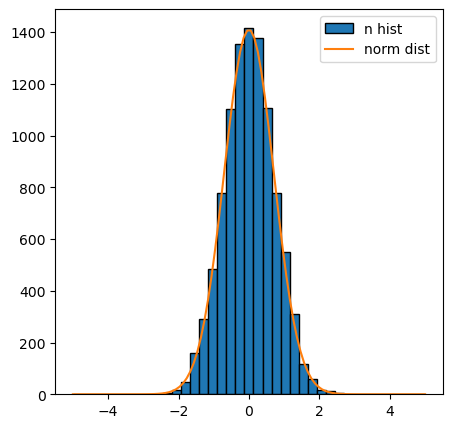

In [32]:
# checking if n is gaussian
bins = np.linspace(-5, 5, num=40)
mp.hist(n, bins, edgecolor='black', label = 'n hist')

x = np.linspace(-5, 5, num=100)
mp.plot(x, B/4*norm.pdf(x,Mu, np.sqrt(N0/2)), label = 'norm dist')
#mp.xlim(-5, 5)

mp.legend()
mp.show()

### MPSK blocks

#### Encoder

In [33]:
# creating the M-PSK encoder which will return the M-ary symbols
def MPSK(v, M, E):
    k = int(np.log2(M))
    
    #the MPSK symbols will be mapped in a grey sequence
    MPSK_symbols = grey_code_seq_gen(k)
    
    #the input sequence v will be gruped in blocks of k bits
    w = k_bits_group(v, k)
    v_symbols = np.zeros(len(w), dtype = 'int')

    #loop to map eack group of bits in a MPSK symbol
    for i in range(len(w)):
        for j in range(len(MPSK_symbols)):
            if np.array_equal(w[i], MPSK_symbols[j]) == True:
                v_symbols[i] = j
    
    #creating the I/Q output based in the symbols
    angle_shift = 2 * np.pi / M
    
    I = np.zeros(len(w))
    Q = np.zeros(len(w))
    
    for i in range(len(w)):
        I[i] = np.sqrt(E) * np.cos(angle_shift * v_symbols[i])
        Q[i] = np.sqrt(E) * np.sin(angle_shift * v_symbols[i])
    
    return w, v_symbols, I, Q

In [50]:
#verifying the MPSK encoder
BPSK = MPSK([0,1], 2, 3)
BPSK

(array([[0],
        [1]]),
 array([0, 1]),
 array([ 1.73205081, -1.73205081]),
 array([0.00000000e+00, 2.12115048e-16]))

In [51]:
QPSK = MPSK([0,0,0,1,1,0,1,1], 4, 2)
QPSK

(array([[0, 0],
        [0, 1],
        [1, 0],
        [1, 1]]),
 array([0, 1, 3, 2]),
 array([ 1.41421356e+00,  8.65956056e-17, -2.59786817e-16, -1.41421356e+00]),
 array([ 0.00000000e+00,  1.41421356e+00, -1.41421356e+00,  1.73191211e-16]))

In [52]:
PSK8 = MPSK([0,0,0,0,0,1,0,1,0,0,1,1,1,0,0,1,0,1,1,1,0,1,1,1], 8, 1)
PSK8

(array([[0, 0, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 1, 1],
        [1, 0, 0],
        [1, 0, 1],
        [1, 1, 0],
        [1, 1, 1]]),
 array([0, 1, 3, 2, 7, 6, 4, 5]),
 array([ 1.00000000e+00,  7.07106781e-01, -7.07106781e-01,  6.12323400e-17,
         7.07106781e-01, -1.83697020e-16, -1.00000000e+00, -7.07106781e-01]),
 array([ 0.00000000e+00,  7.07106781e-01,  7.07106781e-01,  1.00000000e+00,
        -7.07106781e-01, -1.00000000e+00,  1.22464680e-16, -7.07106781e-01]))

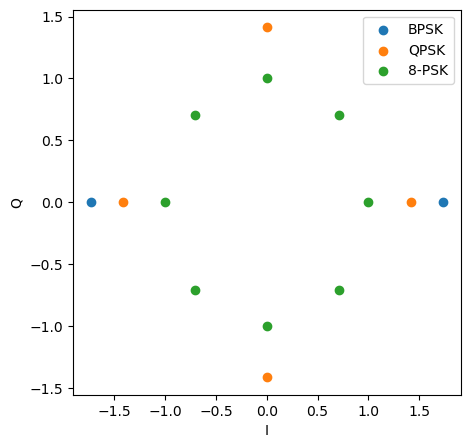

In [53]:
mp.rcParams["figure.figsize"] = [5, 5]

mp.scatter(BPSK[2], BPSK[3], label = 'BPSK')
mp.scatter(QPSK[2], QPSK[3], label = 'QPSK')
mp.scatter(PSK8[2], PSK8[3], label = '8-PSK')

mp.xlabel('I')
mp.ylabel('Q')

mp.legend()
mp.show()

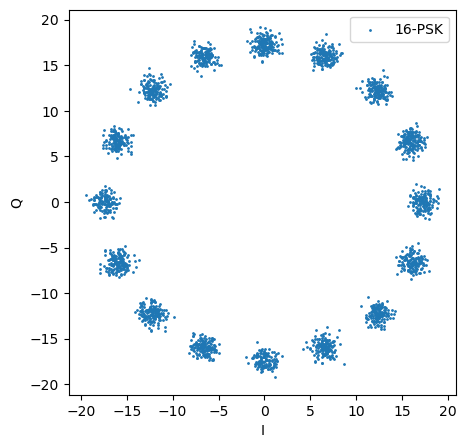

In [54]:
#creating a PSK16 transmission with some noise
PSK16 = MPSK(b, 16, 300)
nI = AWGN(0, np.sqrt(N0/2), int(B/4))
nQ = AWGN(0, np.sqrt(N0/2), int(B/4))

mp.scatter(PSK16[2] + nI, PSK16[3] + nQ, label = '16-PSK', s = 1)

mp.xlabel('I')
mp.ylabel('Q')

mp.legend()
mp.show()

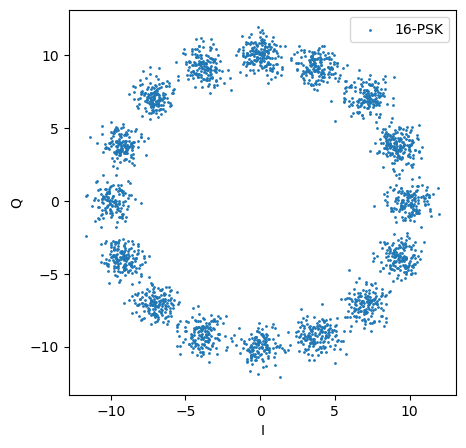

In [42]:
#creating a PSK16 transmission with some more noise
PSK = MPSK(b, 16, 100)
nI = AWGN(0, np.sqrt(N0/2), int(B/4))
nQ = AWGN(0, np.sqrt(N0/2), int(B/4))

mp.scatter(PSK[2] + nI, PSK[3] + nQ, label = '16-PSK', s = 1)

mp.xlabel('I')
mp.ylabel('Q')

mp.legend()
mp.show()

#### Decider

#### Decoder

### MFSK blocks

Work in progress

### MQAM blocks

Work in progress

## References

<a id='ref_1'></a>
[1] Energy per bit to noise power spectral density ratio - https://en.wikipedia.org/wiki/Eb/N0

<a id='ref_2'></a>
[2] [Bernard Sklar, Pabitra Kumar Ray. Digital Communications - Fundamentals and Applications. 2Ed.](https://www.amazon.com/Digital-Communications-Fundamentals-Applications-2-ebook/dp/B01LX758XY/)

<a id='ref_3'></a>
[3] Generate n-bit Gray Codes - https://www.geeksforgeeks.org/generate-n-bit-gray-codes/